<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-2 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> MLP for Binary Classification </h2> </html>

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.




<html> <h3 style="font-style:bold; color:blue;"> Here and in future practice sessions, if you see the following expression  </h3> </html>

#Your code to ......

#....

#....

<html> <h3 style="font-style:bold; color:blue;"> 
    you must write your code to solve the problem in this cell. 
    
Usually, the requirement will have a link where you can find information and examples of the solution, or you must take similar code from previous weeks' Jupyter Notebooks.  

As usual, you can compare your result with the result in the next (control) cell.
</h3> </html>


In [1]:
# Importing Libraries


# Your code to import read_csv class from pandas:

from pandas import read_csv
import numpy as np


# Your code to import train_test_split class from sklearn: 
# Follow link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split



In [2]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2026-02-05 07:23:35.753586: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-05 07:23:35.797653: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-05 07:23:36.901510: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


__________________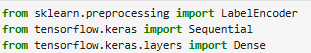

### Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

df=read_csv(path,header=None)

___________________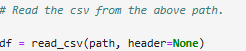

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Have a look at:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [4]:
# Your code to print first few rows of the dataset:

df.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
# Your code to print information about the dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the basic info of the dataset. Use 

dataframe.info() 

from pandas library


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the shape of the dataframe.Use 

dataframe.shape 

method.

In [6]:
# Your code to print the shape of the dataset:

df.shape


(351, 35)

### Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


______________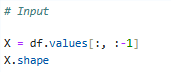

In [7]:
X=df.values[:, :-1]
X.shape

(351, 34)

In [8]:
# Your code to get y  
# Hint y = df.values[:, some parameters]
y=df.values[:,-1]

# Your code to print 'y' shape:
y.shape


(351,)

In [ ]:
X=X.astype('float32')


y=LabelEncoder().fit_transform(y)


___________________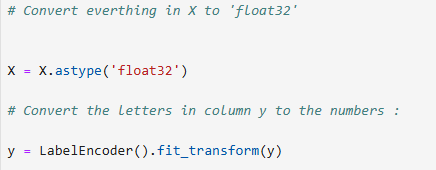

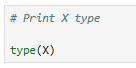

In [9]:
type(X)

numpy.ndarray

numpy.ndarray

In [28]:
#LabelEncoder?
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, 
# *i.e.* `y`, and not the input `X`.

In [10]:
#LabelEncoder.fit_transform?


In [11]:
# Print the genral information of the X and y 

# Your code to print X:

print(X)

# Your code to print y:

print(y)

# your code to print shape of X. Remember X is a numpy array

print(X.shape)

# your code to print shape of y. Remember y is a numpy array

print(y.shape)


[[1 0 0.99539 ... -0.54487 0.18641 -0.453]
 [1 0 1.0 ... -0.06288 -0.13738 -0.02447]
 [1 0 1.0 ... -0.2418 0.56045 -0.38238]
 ...
 [1 0 0.94701 ... 0.00442 0.92697 -0.00577]
 [1 0 0.90608 ... -0.03757 0.87403 -0.16243]
 [1 0 0.8471 ... -0.06678 0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(351, 34)
(351,)


[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

#### Separate X and y into training and test set with a ratio of your choice. 

Use sklearn train_test_split class.

Have a look at:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [47]:
#train_test_split?

In [12]:
# Your code to separate the data into trauning and test set:

X_train , X_test , y_train ,y_test =train_test_split(X,y, test_size=0.25)


In [13]:
# Print the shapes of the resulting arrays:

# Your code to print shape of X_train
# Your code to print shape of X_test
# Your code to print shape of y_train
# Your code to print shape of X_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)


(263, 34)
(88, 34)
(263,)
(88, 34)


(235, 34) (116, 34) (235,) (116,)


_____________________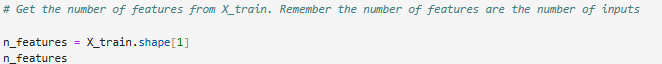

In [14]:
n_features = X_train.shape[1]
n_features

34

34

<html> <h2 style="font-style:bold; color:blue;"> Creating a Multi-layer Perceptron using Keras </h2> </html>

We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose
https://keras.io/api/layers/core_layers/dense/

In [15]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))

# Your code to add as many layers with activation functions of your choice:

model.add(Dense(80 , activation='relu',input_shape=(10)))
model.add(Dense(160 , activation='relu',input_shape=(80)))
model.add(Dense(80 , activation='relu',input_shape=(160)))
model.add(Dense(20 , activation='relu',input_shape=(80)))

model.add(Dense(1, activation='sigmoid'))

/home/suriya/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1770275924.287218   12676 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1770275924.292953   12676 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


_________________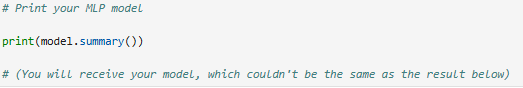

In [19]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,135 (336.47 KB)

 Trainable params: 28,711 (112.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,424 (224.32 KB)

None


The architecture table will differ from the one below and will depend on the number of layers and cells you selected above.
However, the overall appearance of the table will be similar.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447 (1.75 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> MLP training </h3> </html>

In the next cell, we trained the above neural network model and tested its accuracy. 

___________________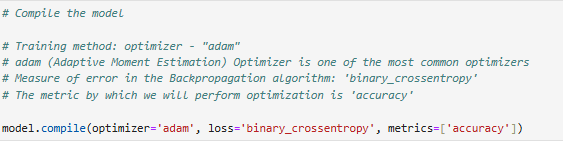

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_____________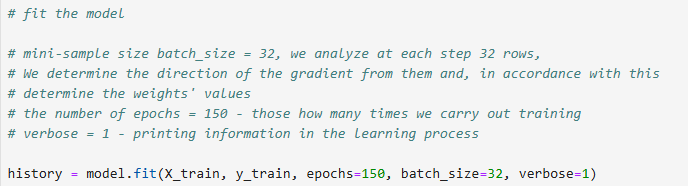

In [20]:
history=model.fit(X_train,y_train,epochs=150, batch_size=32, verbose=1)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.0114     
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0110
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0105    
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9962 - loss: 0.0103
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9962 - loss: 0.0104
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9962 - loss: 0.0101
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0099
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9962 - loss: 0.0096    
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0093    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0097    
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9962 - loss: 0.0099 
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3299 - loss: 0.7063
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4034 - loss: 0.6804
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7371 - loss: 0.6652
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8110 - loss: 0.6572
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8814 - loss: 0.6369
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8598 - loss: 0.6267
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8648 - loss: 0.6188
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8447 - loss: 0.6050
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8191 - loss: 0.6018
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8407 - loss: 0.5812
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8468 - loss: 0.5665
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8607 - loss: 0.541

__________________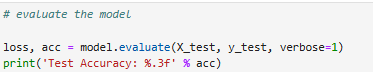

In [21]:
loss ,acc= model.evaluate(X_test , y_test, verbose=1)
print("Test Accuaracy: %0.3f" % acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8864 - loss: 1.2524  
Test Accuaracy: 0.886


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9380 - loss: 0.1838
Test Accuracy: 0.931


___________________________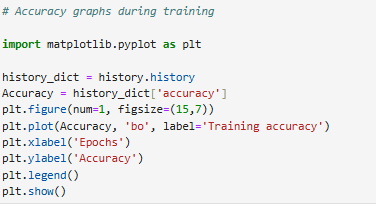

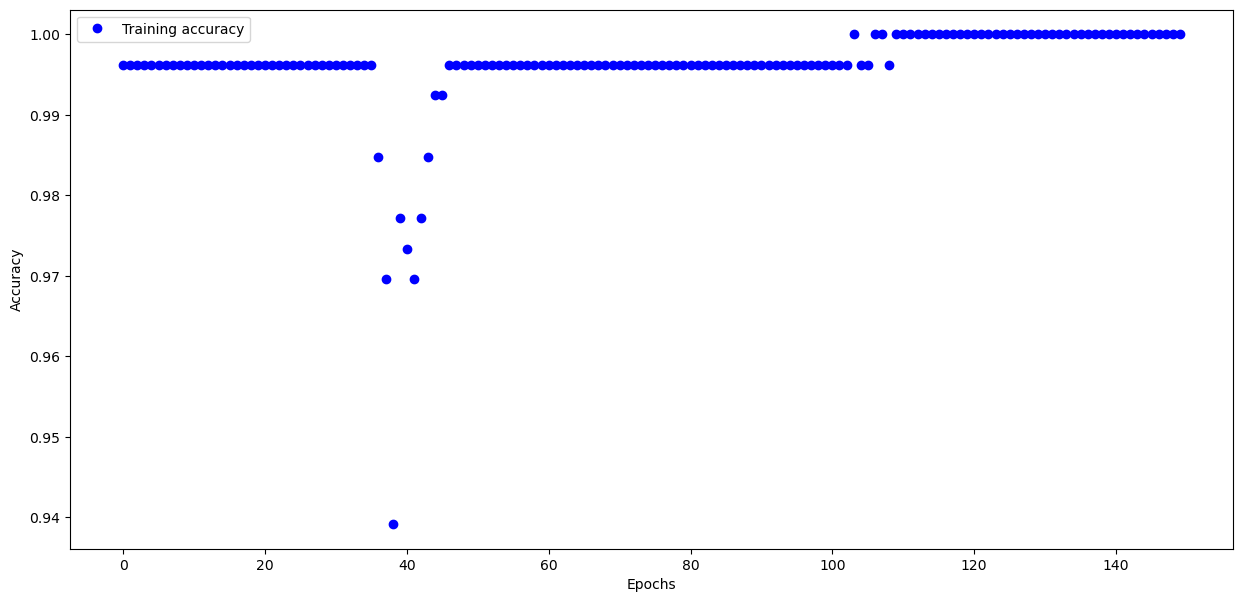

In [22]:
# Accuracy graphs during training

import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** How much accuracy have you got? Compare the accuracy with your peers. **

** Now, change your model (add layers and cells in the cells below) and activation function to get the better accuracy as compared to your peers **

In [129]:
# ...
# ...

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. 

1. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

2. Copy your MLP architectures' screenshots to Logbook.


<html> <h2 style="font-style:bold; color:blue;"> Try out the same model with Keras Functional models! </h2> </html>
(Advanced part)

Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

### Define the layers & create the model object and input & output!

### https://keras.io/guides/functional_api/

#### The Keras Functional API is a way to create complex models, such as those with multiple outputs, models with shared layers, or acyclic graphs.

#### An example of a model with multiple inputs and multiple outputs:

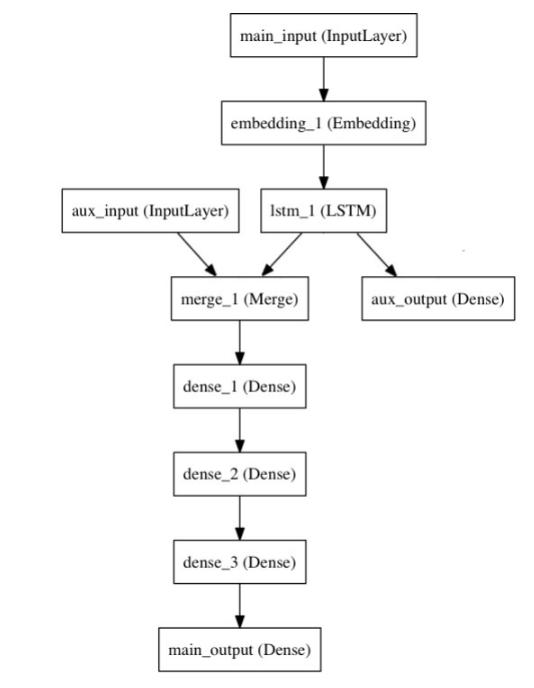

In [117]:
#  Your code of 
# Keras Functional model

# ...
# ...
# ...

In [119]:
# ...